# DAV 5400 Project 3 (M9)


																						Team Member:
                                                                                        - Anub Rai
                                                                                        - Karina Thapa
                                                                                     
                                                                              

-----------

# Table of Contents:


----------------

##  $1.$ Purpose and Objectives

The main aim of the project is to identify which attributes are the best predictors of whether a customer will purchase an additional product. The dataset given is analyzed and performed exploratoy data analysis we will determine which columns are most useful in predicting whether a customer will purchase a new product or not. We will use scikit-learn to evaluate the predictive performance of these columns.

In [96]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [97]:
# URL of the dataframe file on GitHub
import pandas as pd
#loading it from the github account
url = "https://raw.githubusercontent.com/karinathpa/DAV-5400/main/Project%204%20DATA.csv"
df = pd.read_csv(url)
#reading the data

In [98]:
#showing the dataframe loaded above from github
df

,TARGET,loyalty,ID,age,city,prod_A,type_A,type_B,prod_B,turnover_A,turnover_B,age_P,lor_M
0,Y,99,77,66,2,0,0,0,0,333.561114,264.721010,66,3
1,Y,1,159,45,2,1,3,3,1,394.735699,284.904978,45,39
2,Y,1,220,42,2,1,3,6,1,342.180990,1175.589721,42,27
3,Y,99,303,31,2,0,0,0,0,453.757916,242.341754,31,3
4,Y,99,306,62,2,0,0,0,0,384.577469,287.008370,62,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14011,Y,99,151601,30,2,0,0,0,0,386.434278,284.309508,30,3
14012,Y,1,151634,27,2,1,3,3,1,376.842591,266.993794,27,27
14013,Y,99,151679,26,2,0,0,0,0,434.805703,284.629361,26,3
14014,Y,1,151804,75,2,1,3,3,1,366.273857,270.573265,75,15


In [99]:
#creating a subset of the following columns and extra of turnover_A and turnover_B of my choosing.
columns = ['TARGET', 'age', 'type_A', 'type_B', 'lor_M', 'turnover_A', 'turnover_B']
df_subset = df[columns]


In [100]:
#converting the indicators to digits of 0 and 1.
df_subset['TARGET'] = df_subset['TARGET'].replace({'N': 0, 'Y': 1})
#it replaces all the occurences of 'N' with 0 and 'Y' with 1 in the TARGET column.

C:\Users\msi\AppData\Local\Temp\ipykernel_14004\3807691347.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_subset['TARGET'] = df_subset['TARGET'].replace({'N': 0, 'Y': 1})


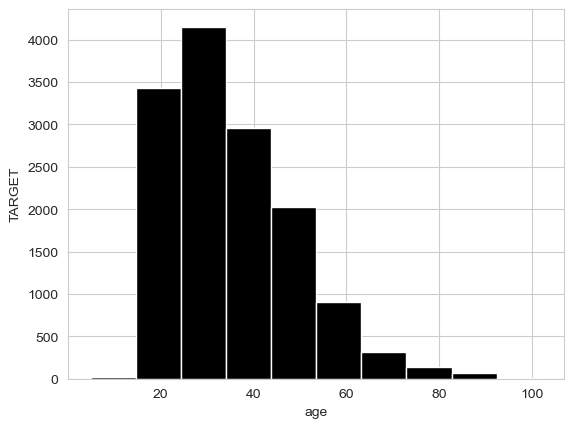

In [101]:
import matplotlib.pyplot as plt
#making a histogram of age vs target and displaying it
plt.hist(df_subset['age'], color='black')
plt.xlabel('age')
plt.ylabel('TARGET')
plt.show()


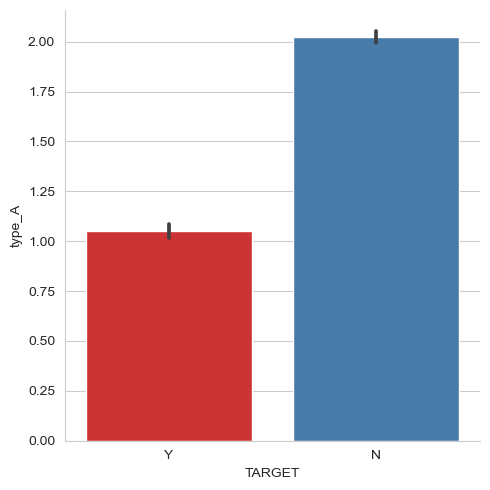

In [102]:
sns.catplot(x='TARGET', y='type_A', data=df, kind='bar', palette='Set1')

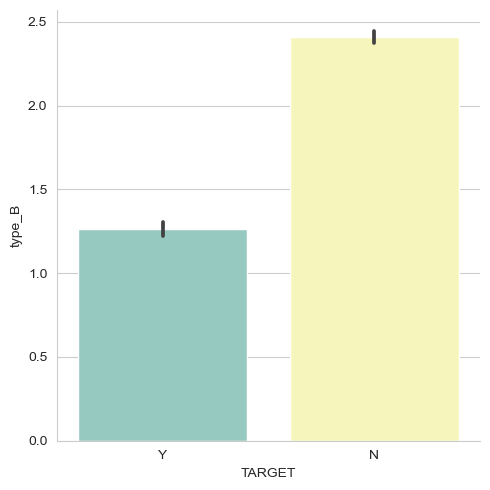

In [103]:
sns.catplot(x='TARGET', y='type_B', data=df, kind='bar', palette='Set3')

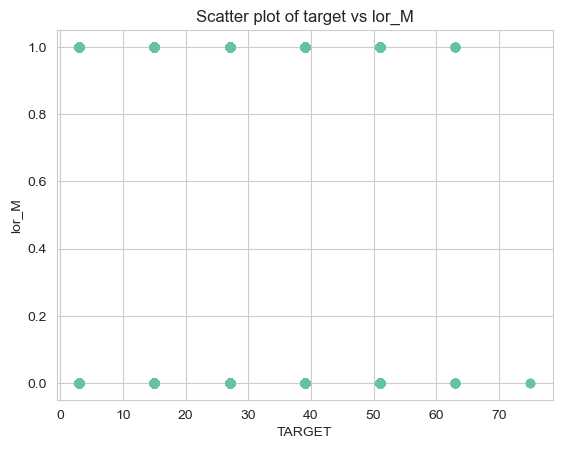

In [104]:
# create a scatter plot of target vs lor_M
plt.scatter(df_subset["lor_M"], df_subset["TARGET"])
# set the x-axis label
plt.xlabel("TARGET")

 # set the y-axis label
plt.ylabel("lor_M")

# set the plot title
plt.title("Scatter plot of target vs lor_M")

# # show the plot
plt.show()

### The above plots and graphs show that the customer from age 20-30 are of the highest product buyers which indicate that the product will next could be bought by around that same age of young adults and it seem to decrease as the age increased. I definitely think the age column could be of massive help to determine whether the particular age group of customers will buy the next product or not.

In [105]:
df_dummies = pd.get_dummies(df_subset, columns=['type_A', 'type_B'])


In [106]:
df_dummies

,TARGET,age,lor_M,turnover_A,turnover_B,type_A_0,type_A_3,type_A_6,type_B_0,type_B_3,type_B_6,type_B_9
0,1,66,3,333.561114,264.721010,1,0,0,1,0,0,0
1,1,45,39,394.735699,284.904978,0,1,0,0,1,0,0
2,1,42,27,342.180990,1175.589721,0,1,0,0,0,1,0
3,1,31,3,453.757916,242.341754,1,0,0,1,0,0,0
4,1,62,3,384.577469,287.008370,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
14011,1,30,3,386.434278,284.309508,1,0,0,1,0,0,0
14012,1,27,27,376.842591,266.993794,0,1,0,0,1,0,0
14013,1,26,3,434.805703,284.629361,1,0,0,1,0,0,0
14014,1,75,15,366.273857,270.573265,0,1,0,0,1,0,0


#### To create dummy variables for the 'Type_A' and 'Type_B' columns, you can use the pandas get_dummies() method.The above code will create binary indicator variables for each unique value in the 'Type_A' and 'Type_B' columns. 

# Phase II

In [107]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split


In [109]:

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df[['age', 'type_A', 'type_B', 'lor_M']], df['Additional_Product_Purchased'], test_size=0.2, random_state=42)

# Create a logistic regression model
logreg = LogisticRegression()

# Fit the model to the training data
logreg.fit(X_train, y_train)

# Print the coefficients of the predictor variables
print(logreg.coef_)


KeyError: 'Additional_Product_Purchased'